##**Kütüphaneleri import etme**

In [5]:
# Bu kütüphane, diziler ve matrislerle çalışma desteğinin yanı sıra bu diziler üzerinde çalışacak çeşitli matematiksel işlevler sağlar.
import numpy as np

# Pandas güçlü bir veri işleme ve analiz kütüphanesidir. Kolay veri işleme ve analize olanak tanıyan DataFrames ve Seriler gibi veri yapıları sağlar
import pandas as pd

# Bu, scikit-learn kütüphanesinin bir parçasıdır ve benzer veri noktalarını kümeler halinde gruplandıran denetimsiz bir makine öğrenme
#algoritması olan K-means kümelemesini gerçekleştirmek için kullanılır.
from sklearn.cluster import KMeans

# "Pyplot" alt modülü, çeşitli türde grafikler ve görselleştirmeler oluşturmaya yönelik işlevler sağlar
import matplotlib.pyplot as plt

import networkx as nx


# Boyutsallığın azaltılması için scikit-learn'in bir diğer kısmı olan PCA (Temel Bileşen Analizi) kullanılır.
from sklearn.decomposition import PCA

pd.set_option("display.max_columns", None)    # Pandas dataframe'de görüntülenecek maksimum sütun sayısını sınırsız olacak şekilde ayarlar
pd.set_option("display.max_rows", None)       # Pandas dataframe'de görüntülenecek maksimum satır sayısını sınırsız olacak şekilde ayarlar
pd.set_option("display.width", None)          # Pandas dataframe için ekranın maksimum genişliğini sınırsız olacak şekilde ayarlar
pd.set_option("display.max_colwidth", None)   # Sütun içeriğinin maksimum genişliğini sınırsız olacak şekilde ayarlayarak metin verilerinin tam olarak görüntülenmesini sağlar

print("Kütüphaneleri eklediniz.")

Kütüphaneleri eklediniz.


## Verileri Pandas dataframe'e yükleme

In [8]:
# CSV dosyasını (dataset) Pandas datafrrame'e yükleme
df = pd.read_csv("https://www.sciencebuddies.org/ai/colab/spotify.csv?t=AQVDvCU5GGNWC9zYg328Rv6LtqH-MAMXLfR9RKWUa5JaLw")

# Datasetindeki ilk 5 elemanı görme
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,Gorillaz - Rhinestone Eyes [Storyboard Film] (Official Music Video),Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,Gorillaz - New Gold ft. Tame Impala & Bootie Brown (Official Visualiser),Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


## Veri setini işleme

NaN verileri silme

In [9]:
# Tablonıun NaN verileri silmeden önceki hali
print("Tablonun NaN verileri silmeden önceki hali:", df.shape)

# NaN verilerin silinmesi
df.dropna(inplace=True)

# Tablonun NaN verilerin silindikten sonraki hali
print("Tablonun NaN verilerin silindikten sonraki hali:", df.shape)
df.head()

Tablonun NaN verileri silmeden önceki hali: (20594, 24)
Tablonun NaN verilerin silindikten sonraki hali: (20592, 24)


,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,Gorillaz - Rhinestone Eyes [Storyboard Film] (Official Music Video),Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,Gorillaz - New Gold ft. Tame Impala & Bootie Brown (Official Visualiser),Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


Özellikleri silme

In [10]:
# Silinmesi istenen kolonları yaz
columns_to_drop = ['Artist', 'Album', 'Album_type', 'Title', 'Channel', 'Licensed', 'official_video', 'most_playedon', 'Track']

# Belirtilen sütunları hariç tutan yeni bir dataframe oluşturma
dropped_df = df.drop(columns=columns_to_drop)

# Belirtilen kolonların orada olup olmadığını kontrol
dropped_df.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
0,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,693555221.0,6220896.0,169907.0,1.040235e+09,1.150082
1,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,72011645.0,1079128.0,31003.0,3.100837e+08,15.183585
2,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,8435055.0,282142.0,7399.0,6.306347e+07,7.956897
3,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,211754952.0,1788577.0,55229.0,4.346636e+08,11.546875
4,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,618480958.0,6197318.0,155930.0,6.172597e+08,9.942693


In [11]:
# Dataframe'deki sayısal kolonlar hakkında bilgilerin özetini sağlamak için define()
dropped_df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,2.059200e+04,2.059200e+04,2.059200e+04,2.059200e+04,20592.000000
mean,0.620162,0.635238,-7.678999,0.096742,0.291419,0.056167,0.193672,0.530128,120.574326,3.742802,9.204529e+07,6.480451e+05,2.684902e+04,1.326451e+08,5.167227
std,0.165399,0.214193,4.639089,0.112183,0.286117,0.193630,0.168829,0.245499,29.565662,2.084986,2.726146e+08,1.773725e+06,1.911843e+05,2.423699e+08,4.117431
min,0.000000,0.000020,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,0.516417,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000049
25%,0.519000,0.507000,-8.868250,0.035700,0.045200,0.000000,0.094100,0.340000,96.994750,2.997546,1.478416e+06,1.754600e+04,4.060000e+02,1.558757e+07,2.386190
50%,0.638000,0.666000,-6.541000,0.050700,0.193000,0.000002,0.125000,0.538000,119.959500,3.551433,1.331348e+07,1.153155e+05,3.006000e+03,4.730244e+07,4.256881
75%,0.741000,0.798000,-4.935000,0.104000,0.477000,0.000474,0.237000,0.727000,139.924500,4.202329,6.740061e+07,5.000950e+05,1.373900e+04,1.343384e+08,6.822034
max,0.975000,1.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,77.934300,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09,59.113924


In [12]:
# TODO: Normalleştirilmesi istenen verileri girme
numerical_columns = ['Loudness', 'Tempo', 'Duration_min', 'Views', 'Likes', 'Comments', 'Energy', 'Liveness', 'Stream', 'EnergyLiveness']

# Temizlenmiş verisetinin kopyasını oluşturma
final_df = dropped_df

# Sayısal özellik sütunlarına min-max ölçeklendirme
final_df[numerical_columns] = (dropped_df[numerical_columns] - dropped_df[numerical_columns].min()) / (dropped_df[numerical_columns].max() - dropped_df[numerical_columns].min())

# Normalizasyonun sonucunu görme
final_df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000
mean,0.620162,0.635230,0.817706,0.096742,0.291419,0.056167,0.181808,0.530128,0.495432,0.041675,0.011392,0.012760,0.001669,0.039169,0.087411
std,0.165399,0.214198,0.098346,0.112183,0.286117,0.193630,0.171314,0.245499,0.121483,0.026932,0.033741,0.034924,0.011887,0.071569,0.069653
min,0.000000,0.000000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.519000,0.506990,0.792494,0.035700,0.045200,0.000000,0.080771,0.340000,0.398545,0.032049,0.000183,0.000345,0.000025,0.004603,0.040365
50%,0.638000,0.665993,0.841831,0.050700,0.193000,0.000002,0.112126,0.538000,0.492906,0.039203,0.001648,0.002270,0.000187,0.013968,0.072011
75%,0.741000,0.797996,0.875877,0.104000,0.477000,0.000474,0.225774,0.727000,0.574941,0.047611,0.008342,0.009847,0.000854,0.039669,0.115404
max,0.975000,1.000000,1.000000,0.964000,0.996000,1.000000,1.000000,0.993000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Veriyi kümeleme

In [13]:
def optimise_k_means(df, k):
  """
Bu fonksiyon verilen bir veri çerçevesi (df) üzerinde K-Means kümeleme algoritmasını kullanarak
kümeleme işlemi gerçekleştirir. Ayrıca, küme sayısını belirlemek için dirsek eğrisini çizer.

  Argümanlar:
      df (pd.DataFrame): Kümelenecek veri girişi
      k (int): Max küme sayısı

  Dönenler:
          wcss (list): Küme içi karelerin toplamı. Bu değer her bir kümenin merkezine olan uzaklıkların karelerinin toplamını ifade eder.
          fig (matplotlib.figure.Figure): Dirsek eğrisi grafiğini içeren şekil nesnesi
  """

  wcss = []

  # Loop through different values of k
  for i in range(1, k + 1):
      kmeans = KMeans(n_clusters=i, random_state=2)
      kmeans.fit(df)
      wcss.append(kmeans.inertia_)

  # Plot the elbow curve
  fig = plt.figure(figsize=(7, 7))
  plt.plot(range(1, k + 1), wcss, 'ko')
  plt.ylabel('WCSS', size=14)
  plt.xlabel('Number of clusters', size=14)
  plt.title('Elbow Curve for K-Means Clustering', size=16)
  plt.grid(True)

  return wcss, fig

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

([6844.950625233814,
  4952.226995956458,
  4272.9805948277535,
  3658.9682924240265,
  3345.9661673755104,
  3084.3030005803075,
  2895.8013637258437,
  2736.1839391692074,
  2625.5366643890507,
  2542.8274524008552],
 <Figure size 700x700 with 1 Axes>)

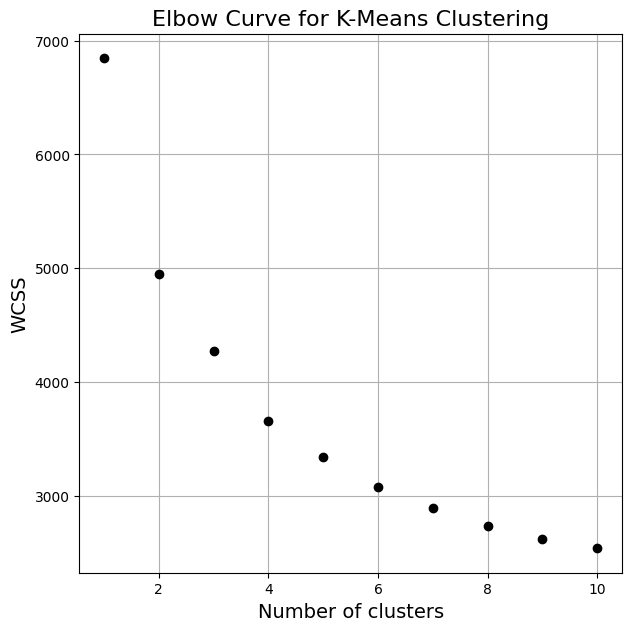

In [14]:
optimise_k_means(final_df, 10)

## K-Means Kümelenmesini Uygulama

In [15]:
# 3 kümeli K-Means modeli oluşturma
kmeans = KMeans(n_clusters= 3, n_init='auto') # TODO: Insert number of clusters

# Veri setinin son halini K-Means modeline sığdırma
kmeans.fit(final_df)

# Her veri noktasına küme etiketi atama
df['Cluster'] = kmeans.labels_
final_df['Cluster'] = kmeans.labels_

df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon,Cluster
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify,1
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,Gorillaz - Rhinestone Eyes [Storyboard Film] (Official Music Video),Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify,1
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,Gorillaz - New Gold ft. Tame Impala & Bootie Brown (Official Visualiser),Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify,1
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify,1
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube,1


## Modeli görselleştirme

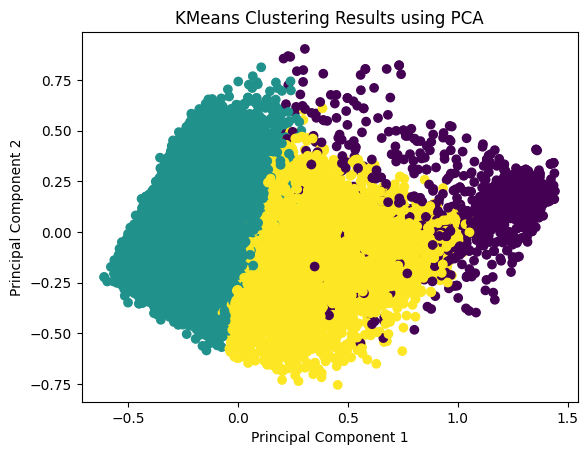

In [16]:
# Veri kümesinin boyutunu azaltma
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(final_df.drop('Cluster', axis=1)) # Exclude the cluster labels

# Add the reduced components to the DataFrame
final_df['pca_1'] = reduced_features[:, 0]
final_df['pca_2'] = reduced_features[:, 1]

# Küme dağılım grafiği oluşturma
plt.scatter(final_df['pca_1'], final_df['pca_2'], c=final_df['Cluster'], cmap='viridis')
plt.title('KMeans Clustering Results using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##Şarkı Öneri Fonksiyonu

In [17]:
def find_track_index(track_name, df):
    try:
        # Parça adı dizinin işlevini çağırma
        track_index = df[df['Track'] == track_name].index[0]
        # Bulunurse dizin döndürme
        return track_index
    except IndexError:
        # Parça adı bulunmadıysa hiçbir şey dönmesin
        return None

In [18]:
def find_song_recommendation(track_name, df):
    # Parça adı dizinin işlevini çağırma
    track_index = find_track_index(track_name, df)
    cluster = df.loc[track_index]['Cluster']

    # Aynı kümede olan ve benzer şarkıların filtresini oluşturma
    filter = (df['Cluster'] == cluster)

    # Filtreyi uygulama
    filtered_df = df[filter]

    # Filtrelenmiş dataframe'den parçaları rastgele seçerek şarkı önerileri oluşturma
    for i in range(5):
        # Karıştırılan dataframe'den şarkı seçme
        recommendation = filtered_df.sample()
        # Şarkının adını yazdırma
        print(recommendation.iloc[0]['Track'] + ' by ' + recommendation.iloc[0]['Artist'])

In [19]:
# Şarkı adı girme
find_song_recommendation('Digital Bath', df) #my own summer(shove it)

Gang Signs (feat. ScHoolboy Q) by Freddie Gibbs
Las 12 by Kevin Roldan
Masterpiece by Motionless In White
Hay Otro en Mi Vida by La Factoria
187 Gang by LX


## Rasgele Şarkı Öneri Fonksiyonu


In [20]:
def find_random_song(track_name, df):
    # Parça adı dizinin işlevini çağırma
    track_index = find_track_index(track_name, df)
    cluster = df.loc[track_index]['Cluster']

    # Aynı kümede olmayan ama benzer şarkıların filtresini oluşturma
    filter = (df['Cluster'] != cluster)

    # Filtreyi uygulama
    filtered_df = df[filter]

    # Filtrelenmiş dataframe'den parçaları rastgele seçerek şarkı önerileri oluşturma
    for i in range(5):
        # Karıştırılan dataframe'den şarkı seçme
        random_song = filtered_df.sample()
        # Şarkının adını yazdırma
        print(random_song.iloc[0]['Track'] + ' by ' + random_song.iloc[0]['Artist'])

In [21]:
# Şarkı adı giriniz
find_random_song('Mr. Brightside', df)

Fitoor by Neeti Mohan
Papo Furado / Quero Mais / História de Cinema / Amor Eterno by Pixote
(Ghost) Riders in the Sky - Live at Nassau Coliseum, Uniondale, NY - March 1990 by Waylon Jennings
Algo Contigo by Vicentico
She's Everything by Brad Paisley


## Modeli Değerlendirme


In [22]:
# Tavsiye edilen şarkıların tutarlılığını standart halinde girme
recommendations_accuracy = [0.6, 0.8, 0.6, 1, 0.6, 0.4, 0.4]
random_songs_accuracy = [0.2, 0.4, 0.2, 0.6, 0.2, 0]

recommendations_average = sum(recommendations_accuracy) / len(recommendations_accuracy)
random_songs_average = sum(random_songs_accuracy) / len(random_songs_accuracy)

print("Tavsiye edilen şarkıların tutarlılığı:", recommendations_average)
print("Rasgele tavsiye edilen şarkıların tutarlılığı:", random_songs_average)

Tavsiye edilen şarkıların tutarlılığı: 0.6285714285714287
Rasgele tavsiye edilen şarkıların tutarlılığı: 0.26666666666666666


# Ağ grafları

In [23]:
df = pd.read_csv("https://www.sciencebuddies.org/ai/colab/spotify.csv?t=AQVDvCU5GGNWC9zYg328Rv6LtqH-MAMXLfR9RKWUa5JaLw")

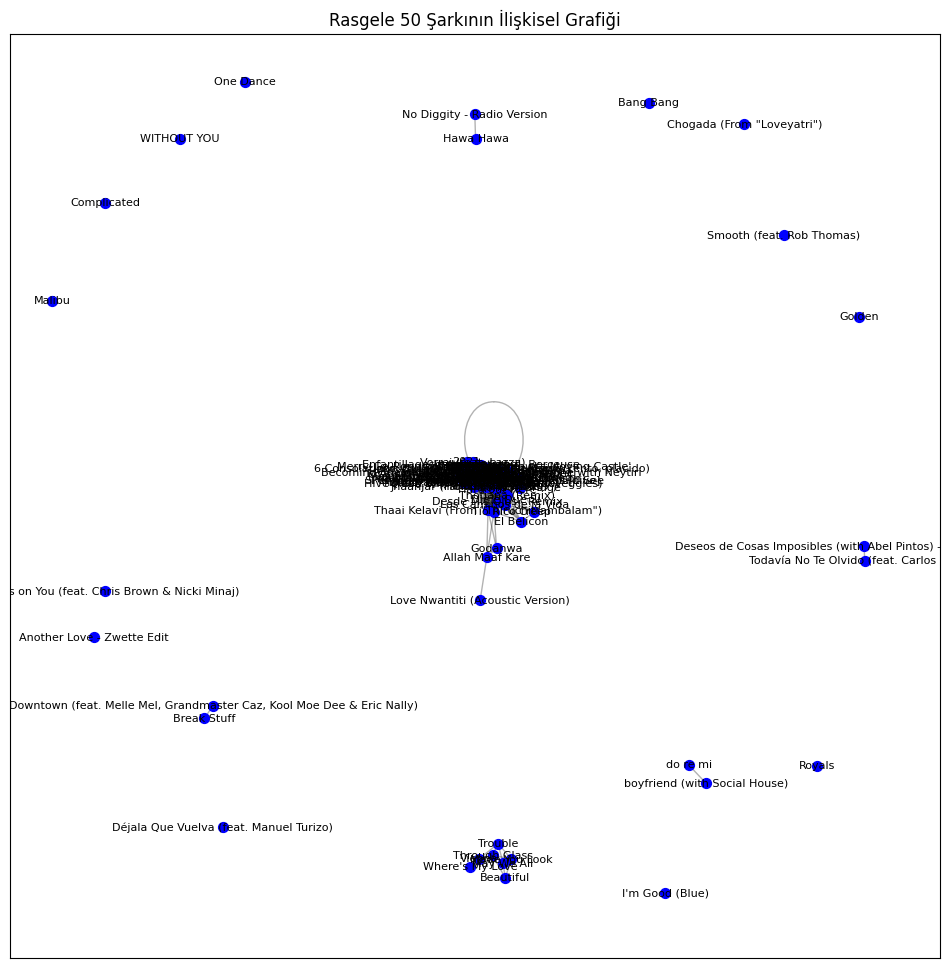

In [24]:
import networkx as nx
from sklearn.metrics import pairwise_distances

def create_graph(df, num_songs=50, random=False):
    """
    Verilen bir dataframe'den belirli sayıda şarkıyı kullanarak bir ilişkisel ağ grafı oluşturur.

    Argümanlar:
        df (pd.DataFrame): Şarkı veri seti
        num_songs (int): Grafikte kullanılacak şarkı sayısı (default: 100)
        random (bool): Şarkıların rastgele seçilip seçilmeyeceği (default: False)

    Dönenler:
        G (networkx.Graph): Oluşturulan ilişkisel ağ grafı
    """
    # Şarkıları seçme
    if random:
        selected_df = df.sample(n=num_songs, random_state=42)
    else:
        selected_df = df.head(num_songs)

    # Şarkı isimlerini alma
    track_names = selected_df['Track'].values

    # Sayısal özelliklerden mesafe matrisi oluşturma
    features = selected_df[numerical_columns].values
    distance_matrix = pairwise_distances(features, metric='euclidean')

    # Eşik değer belirleme (örneğin, medyan mesafenin yarısı)
    threshold = np.median(distance_matrix) / 2

    # Graph oluşturma
    G = nx.Graph()

    # Şarkı isimlerini düğüm olarak ekleme
    for track in track_names:
        G.add_node(track)

    # Kenarları ekleme
    for i in range(len(track_names)):
        for j in range(i + 1, len(track_names)):
            if distance_matrix[i, j] < threshold:
                G.add_edge(track_names[i], track_names[j])

    return G

# İlk 100 şarkı için ilişkisel ağ grafı oluşturma
G_random = create_graph(df, num_songs=100, random=True)

# Ağ grafiğini görselleştirme
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_random, seed=42)  # Düğüm pozisyonlarını hesaplama
nx.draw_networkx_nodes(G_random, pos, node_size=50, node_color='blue')
nx.draw_networkx_edges(G_random, pos, alpha=0.3)
nx.draw_networkx_labels(G_random, pos, font_size=8)
plt.title('Rasgele 50 Şarkının İlişkisel Grafiği')
plt.show()
